In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [5]:
dataset = pd.read_csv('Exp_1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
bpnn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
svm = SVC(kernel='rbf', gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0),
                            n_estimators=100, random_state=0)
ada_svm = AdaBoostClassifier(base_estimator=SVC(kernel='rbf', gamma='scale', probability=True),
                             n_estimators=100, random_state=0)
xgb = XGBClassifier()

In [11]:
models = [knn, bpnn, svm, rf, ada_rf, ada_svm, xgb]
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [12]:
for i, model in enumerate(models):
    print(f"Training {model_names[i]}...")
    model.fit(X_train,y_train)

Training KNN...
Training BPNN...
Training Kernel SVM...
Training Random Forest...
Training Adaboost Random Forest...
Training Adaboost SVM...
Training XGBoost...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 0.6634615384615384
KNN confusion matrix:
[[130  23]
 [ 47   8]]
KNN ROC AUC: 0.5564468211527035


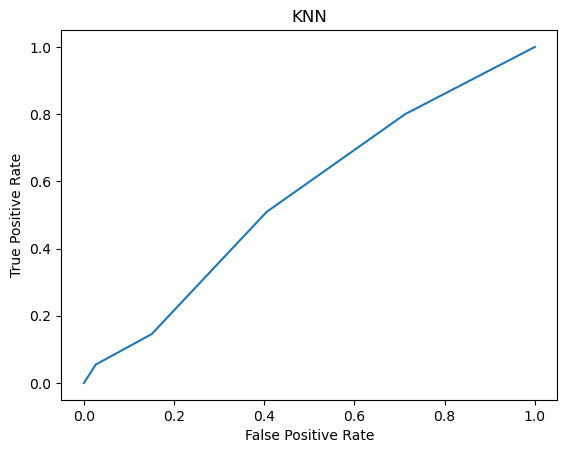

----------------------------------------------------
BPNN accuracy: 0.6538461538461539
BPNN confusion matrix:
[[128  25]
 [ 47   8]]
BPNN ROC AUC: 0.4452762923351158


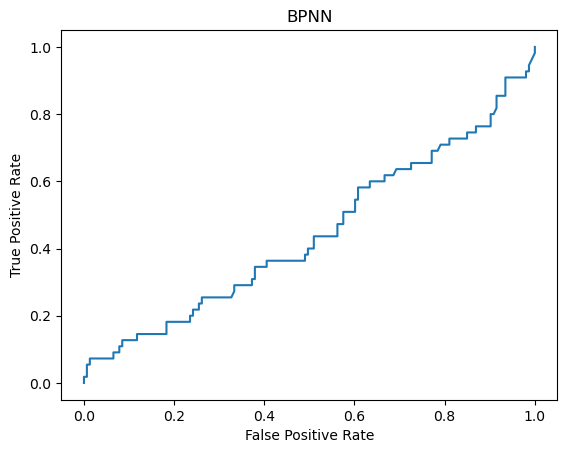

----------------------------------------------------
Kernel SVM accuracy: 0.7355769230769231
Kernel SVM confusion matrix:
[[152   1]
 [ 54   1]]
Kernel SVM ROC AUC: 0.4532382650029709


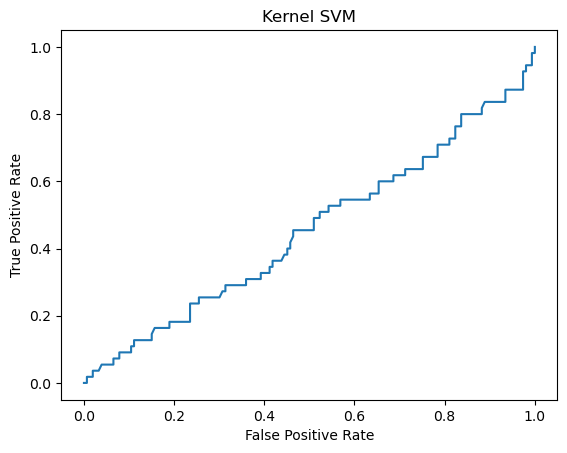

----------------------------------------------------
Random Forest accuracy: 0.6730769230769231
Random Forest confusion matrix:
[[133  20]
 [ 48   7]]
Random Forest ROC AUC: 0.5020796197266785


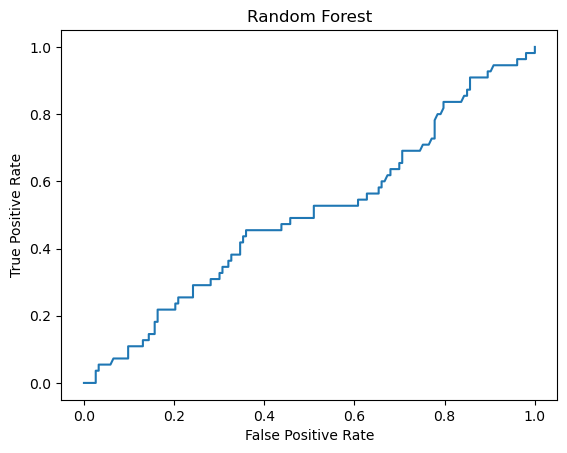

----------------------------------------------------
Adaboost Random Forest accuracy: 0.6682692307692307
Adaboost Random Forest confusion matrix:
[[131  22]
 [ 47   8]]
Adaboost Random Forest ROC AUC: 0.5023172905525846


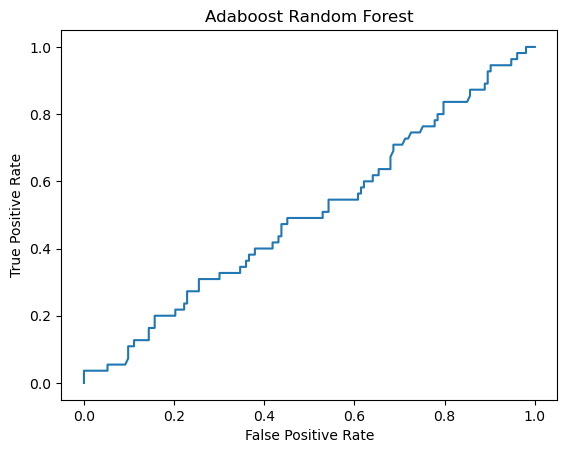

----------------------------------------------------
Adaboost SVM accuracy: 0.7355769230769231
Adaboost SVM confusion matrix:
[[153   0]
 [ 55   0]]
Adaboost SVM ROC AUC: 0.5452168746286393


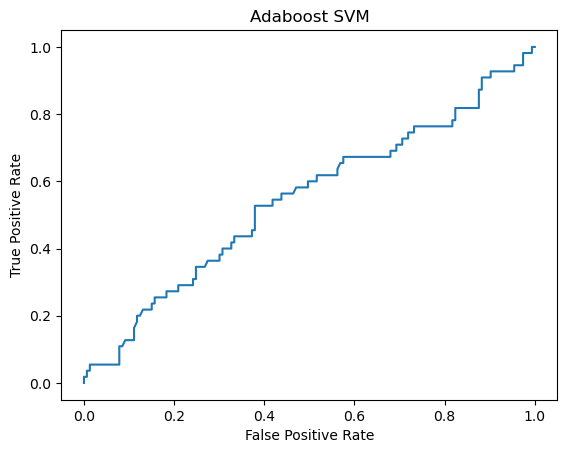

----------------------------------------------------
XGBoost accuracy: 0.6634615384615384
XGBoost confusion matrix:
[[128  25]
 [ 45  10]]
XGBoost ROC AUC: 0.4767676767676768


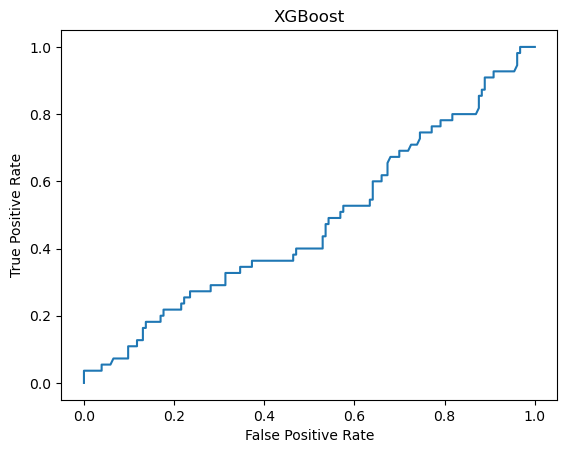

----------------------------------------------------


In [15]:
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"{model_names[i]} accuracy: {acc}")
    print(f"{model_names[i]} confusion matrix:\n{cm}")
    print(f"{model_names[i]} ROC AUC: {roc_auc}")
    plt.plot(fpr,tpr)
    plt.title(model_names[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print("----------------------------------------------------")


In [60]:
dataset1 = pd.read_csv('Exp_1.csv')
xp = dataset1.iloc[: , :-1]
yp = dataset1.iloc[:, -1]

In [61]:
norm = Normalizer()
columns = xp.columns
x_norm = norm.fit_transform(xp)
x_norm = pd.DataFrame(x_norm, columns = columns)
x_norm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F87,F88,F89,F90,F91,F92,F93,F94,F95,F96
0,0.000166,0.002832,0.002777,0.174332,0.154716,0.187467,0.000050,0.000014,0.012709,0.003740,...,0.000003,0.000006,0.000006,0.000006,0.000010,0.000010,0.000008,0.000017,0.000017,0.000017
1,0.000175,0.004403,0.000664,0.143669,0.130689,0.142929,0.001218,0.000010,0.004733,0.003364,...,0.000003,0.000005,0.000005,0.000005,0.000011,0.000010,0.000009,0.000016,0.000016,0.000016
2,0.000101,0.031744,0.054873,0.128565,0.065405,0.075839,0.000062,0.000010,0.029846,0.006438,...,0.000009,0.000010,0.000011,0.000015,0.000013,0.000015,0.000013,0.000023,0.000023,0.000023
3,0.000727,0.011516,0.005808,0.170163,0.150349,0.176890,0.009145,0.001694,0.042524,0.011459,...,0.000003,0.000006,0.000006,0.000005,0.000010,0.000010,0.000009,0.000017,0.000016,0.000016
4,0.005147,0.005844,0.000410,0.180975,0.156624,0.163231,0.003148,0.000015,0.007720,0.008056,...,0.000002,0.000005,0.000005,0.000005,0.000009,0.000008,0.000008,0.000016,0.000016,0.000016


In [62]:
pca = PCA(n_components = 2)
pca.fit(x_norm)
x_pca = pca.transform(x_norm)

In [63]:
x_pca = pd.DataFrame(x_pca, columns = ['Feature_1', 'Feature_2'])
x_pca.head()

,Feature_1,Feature_2
0,-0.001265,-0.007240
1,-0.047608,0.002488
2,-0.165532,0.039008
3,0.002476,-0.009847
4,0.005327,-0.009459


In [70]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, columns = ['Target'])

In [71]:
x_pca = pd.concat([x_pca, y], axis = 1)

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

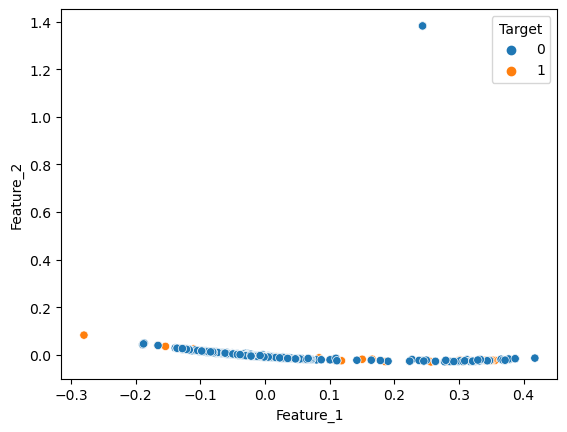

In [72]:
sns.scatterplot(data = x_pca, x='Feature_1', y='Feature_2', hue = 'Target')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, x_pca['Target'], test_size=0.3, random_state=0)

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
bpnn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
svm = SVC(kernel='rbf', gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0),
                            n_estimators=100, random_state=0)
ada_svm = AdaBoostClassifier(base_estimator=SVC(kernel='rbf', gamma='scale', probability=True),
                             n_estimators=100, random_state=0)
xgb = XGBClassifier()

In [75]:
models1 = [knn, bpnn, svm, rf, ada_rf, ada_svm, xgb]
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [76]:
for i, model1 in enumerate(models1):
    print(f"Training {model_names[i]}...")
    model1.fit(Xp_train,yp_train)

Training KNN...
Training BPNN...
Training Kernel SVM...
Training Random Forest...
Training Adaboost Random Forest...
Training Adaboost SVM...
Training XGBoost...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 0.6794871794871795
KNN confusion matrix:
[[200  33]
 [ 67  12]]
KNN ROC AUC: 0.5415602759819633


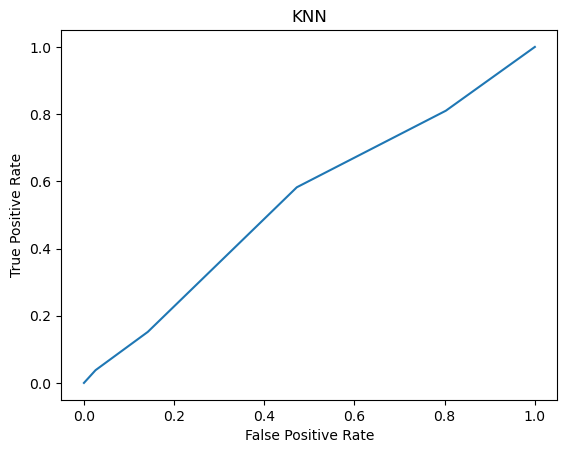

----------------------------------------------------
BPNN accuracy: 0.7467948717948718
BPNN confusion matrix:
[[233   0]
 [ 79   0]]
BPNN ROC AUC: 0.5189873417721519


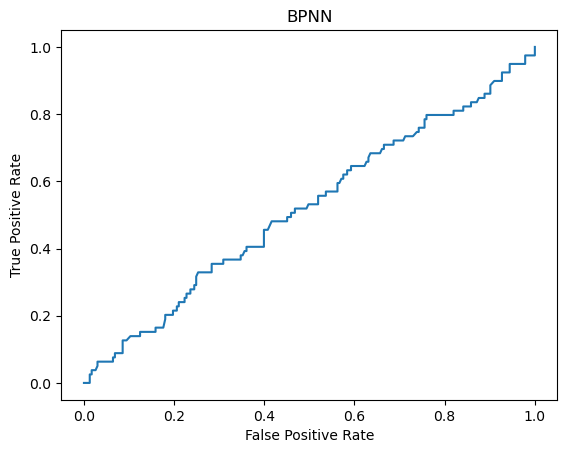

----------------------------------------------------
Kernel SVM accuracy: 0.7467948717948718
Kernel SVM confusion matrix:
[[233   0]
 [ 79   0]]
Kernel SVM ROC AUC: 0.4925843429130222


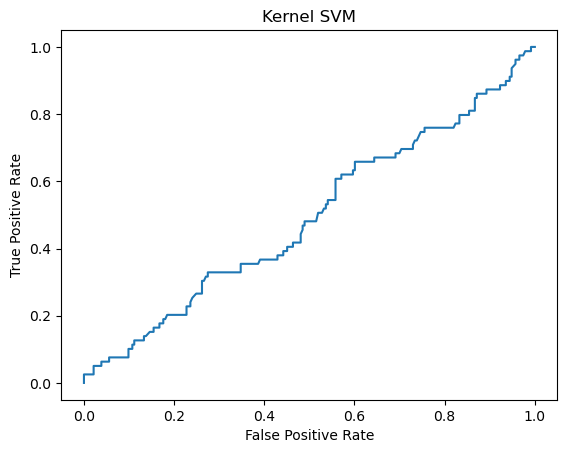

----------------------------------------------------
Random Forest accuracy: 0.6282051282051282
Random Forest confusion matrix:
[[180  53]
 [ 63  16]]
Random Forest ROC AUC: 0.5168142554462976


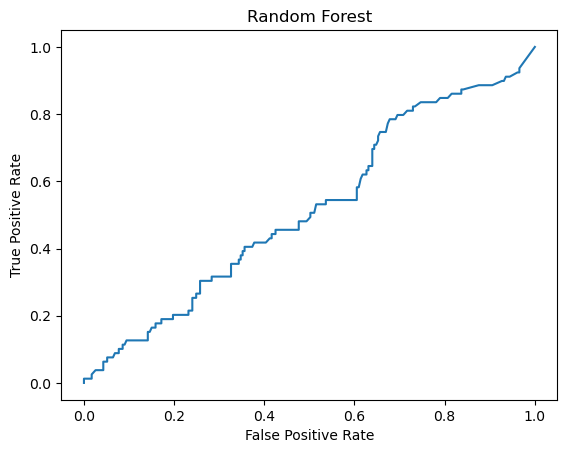

----------------------------------------------------
Adaboost Random Forest accuracy: 0.6506410256410257
Adaboost Random Forest confusion matrix:
[[181  52]
 [ 57  22]]
Adaboost Random Forest ROC AUC: 0.52691910686152


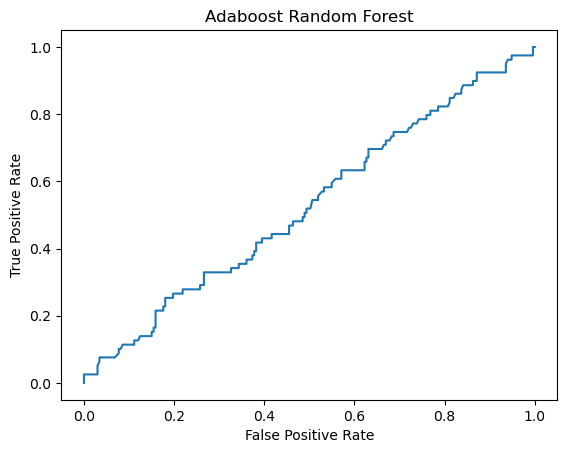

----------------------------------------------------
Adaboost SVM accuracy: 0.7467948717948718
Adaboost SVM confusion matrix:
[[233   0]
 [ 79   0]]
Adaboost SVM ROC AUC: 0.47601455967838324


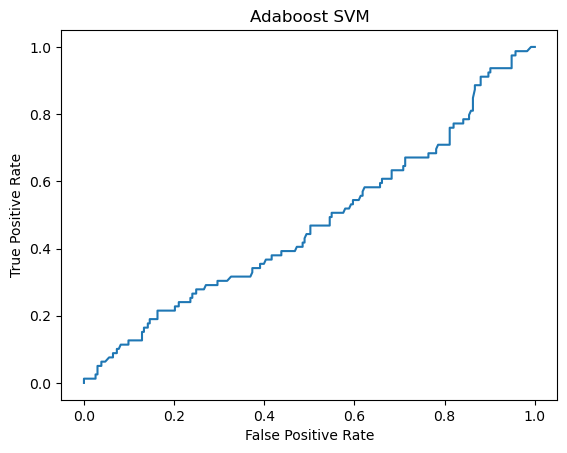

----------------------------------------------------
XGBoost accuracy: 0.6538461538461539
XGBoost confusion matrix:
[[183  50]
 [ 58  21]]
XGBoost ROC AUC: 0.5352311620579128


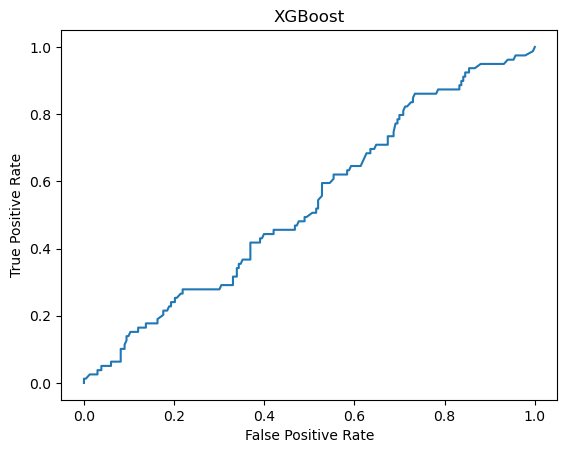

----------------------------------------------------


In [77]:
for i, model1 in enumerate(models1):
    y_pred = model1.predict(Xp_test)
    acc = accuracy_score(yp_test, y_pred)
    cm = confusion_matrix(yp_test, y_pred)
    fpr, tpr, thresholds = roc_curve(yp_test, model1.predict_proba(Xp_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"{model_names[i]} accuracy: {acc}")
    print(f"{model_names[i]} confusion matrix:\n{cm}")
    print(f"{model_names[i]} ROC AUC: {roc_auc}")
    plt.plot(fpr,tpr)
    plt.title(model_names[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print("----------------------------------------------------")
